# Практическая работа №2: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Позолотин Константин и Смирнов Иван. Вариант №18.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный сигнал — это сигнал, дискретный по времени и непрерывный по состоянию.

Среднее значение дискретного сигнала: $M = \frac{\sum_{k=0}^{N}x(k)}{N}$.

Энергия дискретного сигнала: $E = \sum_{k=0}^{N}|x(k)|^2$.

Средняя мощность дискретного сигнала: $P = \frac{E}{N} = \frac{\sum_{n=0}^{N}|x(k)|^2}{N}$.

Огибающая сигнала — это функция, описывающая изменения амплитуды сигнала во времени.

Дискретный прямоугольный импульс:

$$ s_1(k) = \begin{cases} U, \quad n_0 \le k \le n_0 + n_{imp} - 1 \\ 0, \quadиначе \end{cases} $$

Гармонический сигнал:

$$ s(k) = C cos(\widehat{\omega_0} k) $$

## Постановка задачи
С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.



## Выполнение работы

In [1]:
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

Nb = 18
N = 30 + Nb % 5
a = ((-1) ** Nb) * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
U = Nb
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5

#### Задание 1. Смоделировать прямоугольный дискретный импульс

$$s_1(k)= \begin{cases}U, & n_0 \le k \le n_0+n_{imp}-1\\0, & иначе\end{cases}$$

на интервале времени $n \in [0, N-1]$.

Прямоугольный импульс был представлен как линейная комбинация двух дискретных единичных скачков с задержкой:
$$s_1(k)= U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$

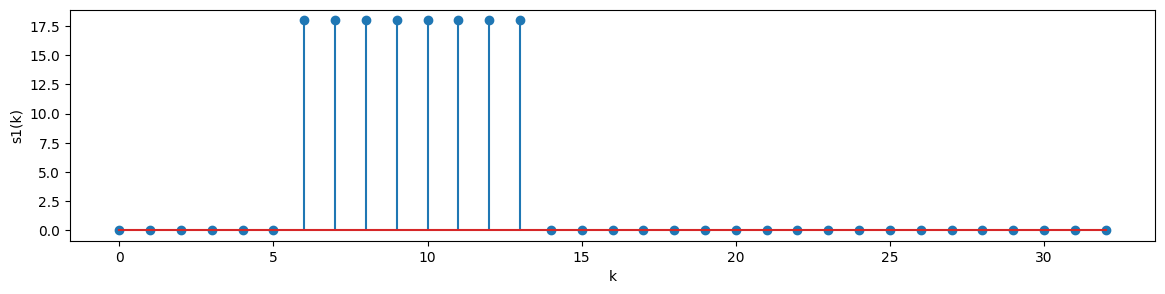

In [10]:
def sigma_d(k): # дискретный единичный скачок из пр.раб. 1
    if k >= 0:
        return 1 
    else:
        return 0

def s1(k):
    return U*(sigma_d(k-n0)-sigma_d(k-(n0+n_imp)))

array1 = np.arange(N)
array = [s1(k) for k in array1]

plt.figure(figsize=(14, 3))
plt.stem(array1, array)
plt.ylabel("s1(k)")
plt.xlabel("k")
plt.show()

Прямоугольный импульс был представлен как линейная комбинация двух дискретных единичных скачков с задержкой:
$$s_1(k)= U(\sigma_d(k-n_0)-\sigma_d(k-n_0-n_{imp}))$$
Так как скачки имеют противоположные знаки в линейной комбинации (но одинаковые амплитуды), то они не гасят друг друга на отрезке $[n_0; n_0 + n_{imp})$.

#### Задание 2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k),$$

$$x_i(k) = B_isin(\widehat{\omega}_i k), \quad i = 1,2,3$$

Среднее значение дискретного сигнала: $$ M_o = \frac{\sum_{k=0}^{5N-1}{s_2(k)}}{5N} $$

Энергия: $$ E = \sum_{k=0}^{5N-1}{s_2^2(k)} $$

Средняя мощность: $$ P = \frac{E}{5N} $$

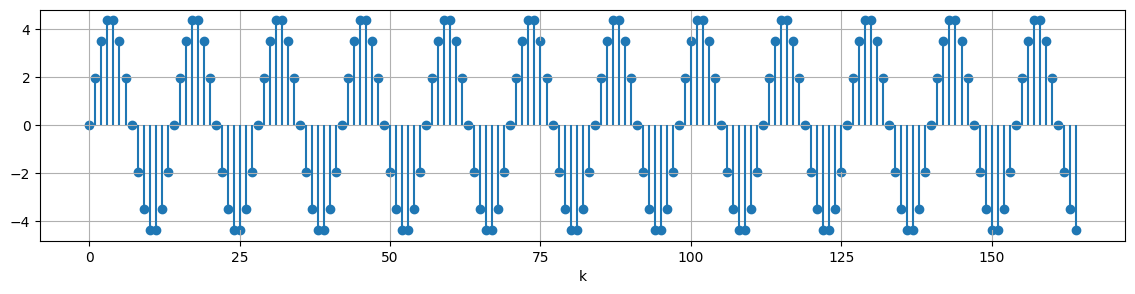

In [3]:
def x1(k):
    return B1*np.sin(w1 * k)

def x2(k):
    return B2*np.sin(w2 * k)

def x3(k):
    return B3*np.sin(w3 * k)

def s2(k):
    return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

sp = np.linspace(0, 5*N - 1, 5*N)

plt.figure(figsize=(14, 3))
plt.scatter(sp, [x1(k) for k in sp], label="x1(k)")
plt.vlines(sp, 0, [x1(k) for k in sp])
plt.xlabel("k")
plt.grid()
plt.show()

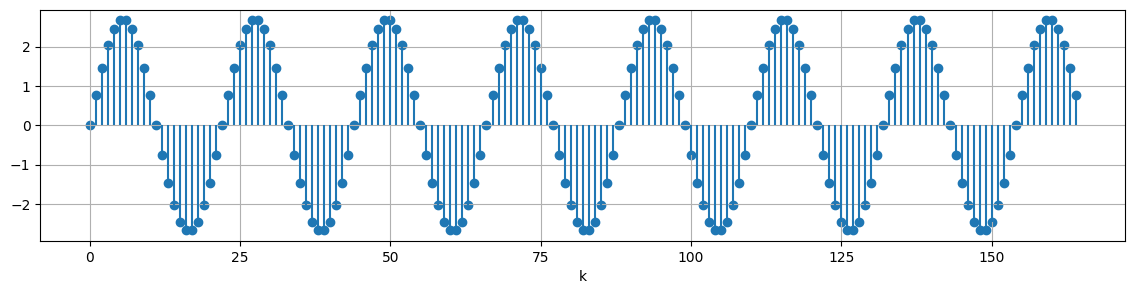

In [4]:
plt.figure(figsize=(14, 3))
plt.scatter(sp, [x2(k) for k in sp], label="x2(k)")
plt.vlines(sp, 0, [x2(k) for k in sp])
plt.xlabel("k")
plt.grid()
plt.show()

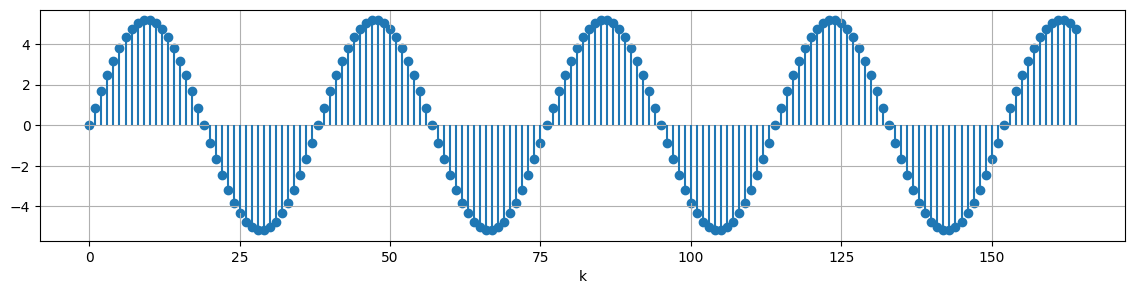

In [5]:
plt.figure(figsize=(14, 3))
plt.scatter(sp, [x3(k) for k in sp], label="x3(k)")
plt.vlines(sp, 0, [x3(k) for k in sp])
plt.xlabel("k")
plt.grid()
plt.show()

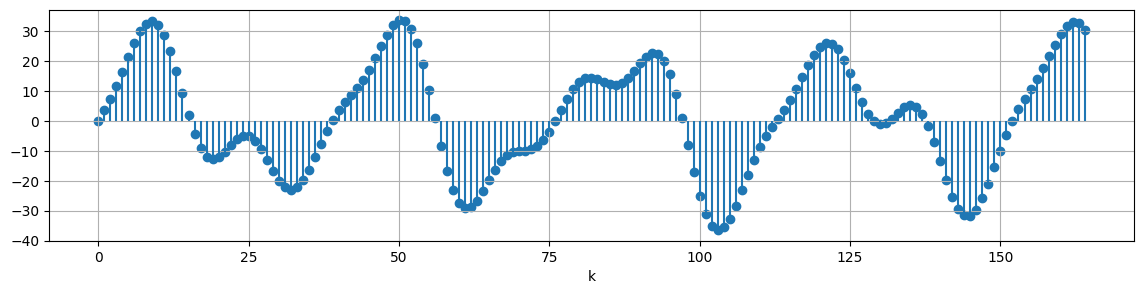

In [6]:
plt.figure(figsize=(14, 3))
plt.scatter(sp, [s2(k) for k in sp], label="s2(k)")
plt.vlines(sp, 0, [s2(k) for k in sp])
plt.xlabel("k")
plt.grid()
plt.show()

In [7]:
sp = np.linspace(0, 5*N - 1, 5*N)
mean_s2 = np.mean(list(map(s2, sp)))
E = np.sum(list(map(lambda s: s2(s)**2, sp)))
P = E / (5*N)
print("mean_s2: ", mean_s2)
print("E: ", E)
print("P: ", P)

mean_s2:  1.5678183541399593
E:  57255.466663179
P:  347.0028282616909


#### Задание 3. Смоделировать дискретный гармонический сигнал $s_3(k)$ и отобразить его огибающую $|a|^k$

Для получения результирующего сигнала, необходимо представить его как произведение дискретного гармонического сигнала $s(k)$ на дискретную экспоненциальную функцию $|a|^k$, то есть:

$$s_3(k)=C\cos(\hatω_0k)*|a|^k$$

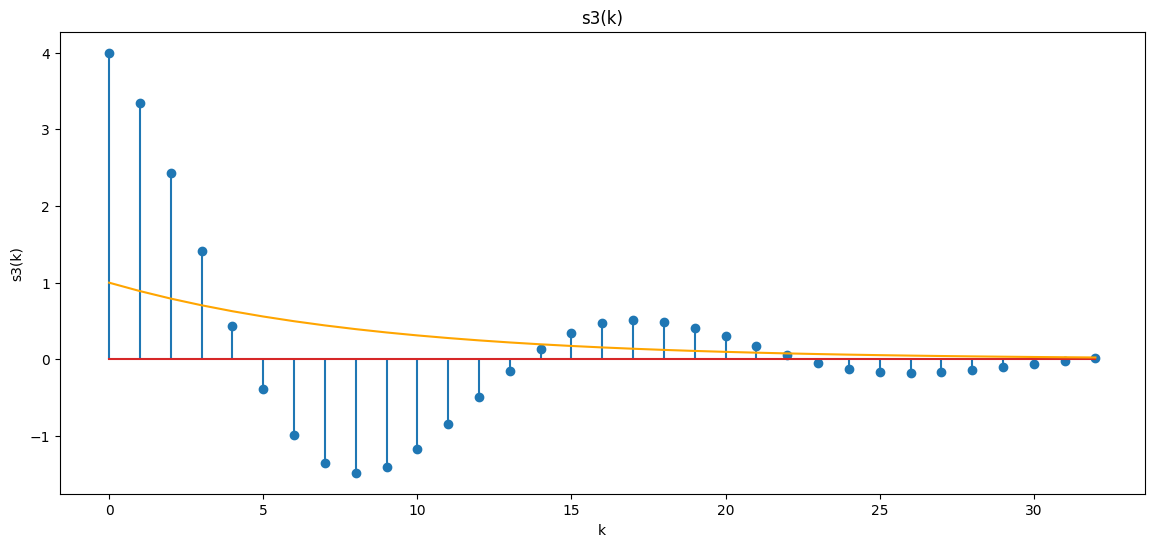

In [8]:
def s3(k):
    return C * np.cos(w0 * k) * np.abs(a)**k

k = np.arange(N)

plt.figure(figsize=(14, 6))
plt.stem(k, [s3(n) for n in k], label="s3(k)")
plt.plot(np.abs(a)**k, color="orange", label="|a|^k")
plt.xlabel('k')
plt.ylabel('s3(k)')
plt.title('s3(k)')
plt.show()

#### 4. Вывести график пяти периодов периодической последовательности $s_4(k)$
Для получения $s_4(k)$ были суммированы прямоугольные импульсы $s_1(k)$ (которые уже имеют длительность $n_{imp}$) с задержкой в $ip$, где $i$ - индекс импулься (0, 1, 2...), а $p = 2n_{imp}$ - период.

$$s_4(k) = \sum_{i = 0}^N{s_1(k - i \cdot 2n_{imp})} $$

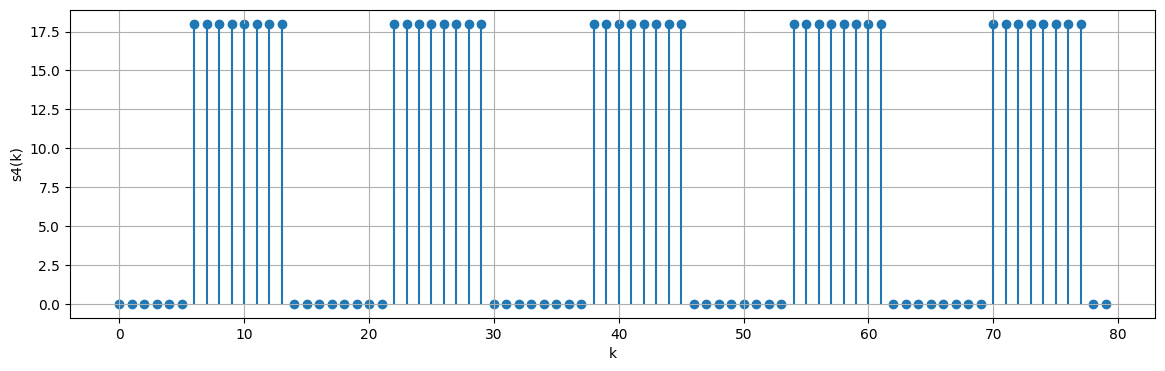

In [9]:
def s4(k):
    return np.sum([ s1(k - (i * p)) for i in range(0, 5) ])

p = 2*n_imp
sp = np.linspace(0, 5*p - 1, 5*p)

plt.figure(figsize=(14, 4))
plt.scatter(sp, [s4(k) for k in sp])
plt.ylabel("s4(k)")
plt.xlabel("k")
plt.vlines(sp, 0, [s4(k) for k in sp])
plt.grid()
plt.show()

## Выводы
В ходе выполнения лабораторной работы было проведено математическое описание линейных комбинаций дискретных гармонических сигналов и их моделирование с использованием языка Python. Были исследованы следующие виды дискретных сигналов: дискретный прямоугольный импульс, дискретные гармонические сигналы и их линейные комбинации. Графики соответствующих сигналов были построены на интервалах дискретного времени, и были вычислены характеристики сигналов, такие как среднее значение, энергия и средняя мощность.

Результаты работы показали, что форма результирующего сигнала зависит от характеристик сигналов, из которых он состоит, и линейных коэффициентов, определяющих амплитуды этих сигналов. Кроме того, в качестве коэффициентов можно использовать другие сигналы, что позволяет создавать огибающие сигналы.

Также было изучено использование линейных комбинаций для создания периодических сигналов, где один сигнал используется с разной задержкой в качестве элементов. В процессе выполнения работы были определены важные характеристики сигналов, такие как среднее значение, энергия и средняя мощность сигнала.

В итоге, данная работа позволила лучше понять математическое описание и влияние различных сигналов и их комбинаций, что является важным аспектом в области сигнальной обработки и анализа.